# To predict diabetes using diabetes data

### Importing libraries

In [1]:
# import all the required libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics

%matplotlib inline

### Loading Dataset 

In [2]:
# Read the dataset

data = pd.read_csv("diabetes1.csv")

In [3]:
data.shape

(768, 9)

In [4]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### Checking missing values


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

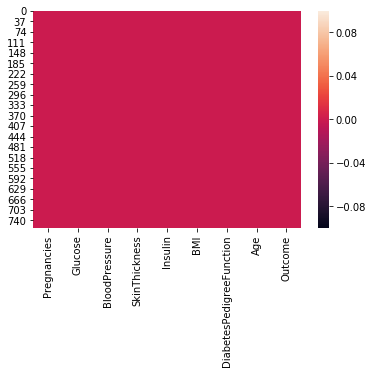

In [7]:
sns.heatmap(data.isnull())

### Replcing 0 with Mean values

In [8]:
for col in ['Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[col].replace({0: data[col].mean()}, inplace = True)


In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


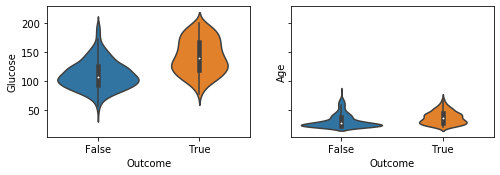

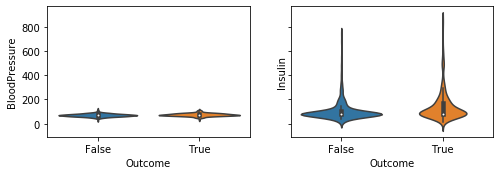

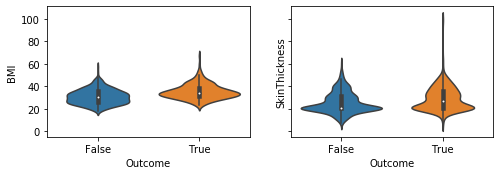

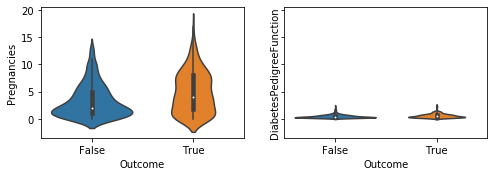

In [10]:
columns = ['Glucose', 'Age', 'BloodPressure', 'Insulin','BMI','SkinThickness' ,'Pregnancies',  'DiabetesPedigreeFunction']
n_cols = 2
n_rows = 4
idx = 0

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(8, 2.4))
    for j in range(n_cols):
        sns.violinplot(x = data.Outcome, y=data[columns[idx]], ax=ax[j]) 
        idx += 1
        if idx >= 8:
            break

In [11]:
# remove the Outlier of skin thickness

max_skinthickness = data.SkinThickness.max()
data = data[data.SkinThickness!= max_skinthickness]


In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.847458,121.583406,72.257746,26.512094,118.710829,32.447873,0.471742,33.203390
std,3.371117,30.333890,12.123564,9.275299,93.130498,6.879379,0.331524,11.721879
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.500000,64.000000,20.536458,79.799479,27.500000,0.243500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.371000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


### Correlation-Matrix 

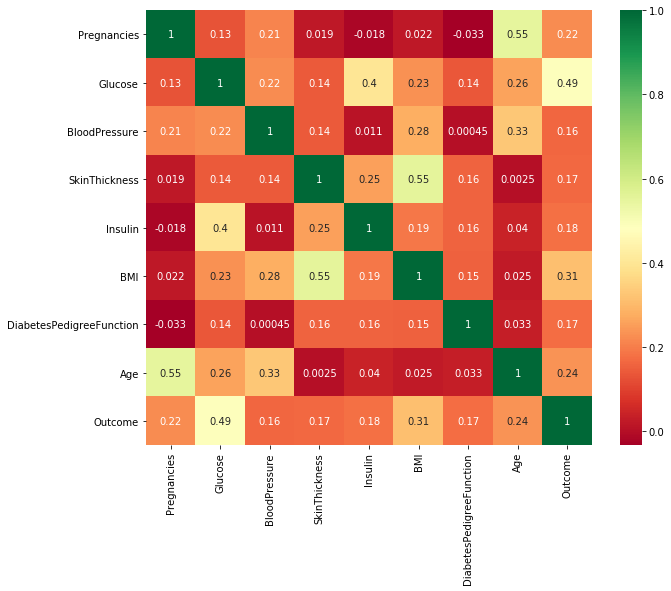

In [13]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,8))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Changing the diabetes column data from boolean to number

In [14]:
diabetes_map = {True: 1, False: 0}

In [15]:
data['Outcome'] = data['Outcome'].map(diabetes_map)

In [16]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


### Splitting data set into features and outcome 

In [17]:
X = data.drop(['Outcome'], axis=1)
Y = data['Outcome']

In [18]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [19]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
581,6,109.0,60.0,27.000000,79.799479,25.0,0.206,27
418,1,83.0,68.0,20.536458,79.799479,18.2,0.624,27
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
363,4,146.0,78.0,20.536458,79.799479,38.5,0.520,67
758,1,106.0,76.0,20.536458,79.799479,37.5,0.197,26


In [20]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.size)
print(Y_test.size)

(536, 8)
(231, 8)
536
231


### Model training and fitting

In [53]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(Y_test, Y_pred)))

Accuracy = 0.775


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### DecisionTree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(Y_test, Y_pred)))

Accuracy = 0.732


#### Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(Y_test, Y_pred)))

Accuracy = 0.771


#### Multilayer Perceptron

In [24]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()
MLP.fit(X_train, Y_train)
Y_pred = MLP.predict(X_test)

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(Y_test, Y_pred)))

Accuracy = 0.693


#### K-Nearest Neighbors

In [25]:
from sklearn.neighbors  import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(Y_test, Y_pred)))

Accuracy = 0.740


In [26]:
from sklearn.metrics import confusion_matrix


In [27]:
confusion_matrix(Y_test,Y_pred)

array([[132,  28],
       [ 32,  39]], dtype=int64)